<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_03_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------

**COPYRIGHT NOTICE:** This Jupyterlab/Colab notebook is a companion supplement to the textbook _Principles of Biostatistics_ by M. Pagano. K. Marcello and H. Mattie (3rd ed) published in 2022 by CRC Press. It is designed to be used in conjunction with -- not as a standalone substitute for – this textbook.  

This notebook is licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at
>http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* Part 3.2: Hypothesis Testing
* Part 3.3: Comparison of Two Means
* Part 3.4: Analysis of Variance (ANOVA)
* Part 3.5: Nonparametric Methods
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* Part 3.8: Correlation
* **Part 3.9: Simple Linear Regression**
* Part 3.10: Multiple Linear Regression
* Part 3.11: Logistic Regression
* Part 3.12: Survival Analysis

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# **Part 3.9: Simple Linear Regression**

Simple linear regression is a statistical method that models the relationship between two variables by fitting a linear equation to observed data. One variable is the independent (or predictor) variable, and the other is the dependent (or response) variable. The equation of the line is typically written as:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

where:

* *$y$* is the dependent variable.
* *$x$* is the independent variable.
* *$\beta_0$* is the y-intercept.
* *$\beta_1$* is the slope of the line.
* *$\epsilon_1$* is the error term.

#### **Importance for Biostatistics**

* **Predictive Modeling:** Helps predict outcomes (e.g., predicting disease risk based on an exposure level).
* **Understanding Relationships:** Quantifies the relationship between variables (e.g., the relationship between smoking and lung function).
* **Public Health:** Aids in evaluating the impact of interventions (e.g., the effect of a new drug on blood pressure).
* **Research:** Fundamental in designing and interpreting experiments and observational studies.

### **Introduction**

Like correlation analysis, **_simple linear regression_** is a technique that is used to explore the nature of the relationship between two continuous random variables. The primary difference between these two analytical methods is that regression enables us to investigate the change in one variable, called the **_response_** or **_outcome_**, which corresponds to a given change in the other, the **_explanatory variable_**. Correlation analysis makes no such distinction; the two variables involved are treated symmetrically. The ultimate objective of regression analysis is to predict or estimate the value of the response that is associated with a fixed value of the explanatory variable.  

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 399). CRC Press. Kindle Edition. 

## **Datasets for this Lesson**

In this lesson we will be using 3 datasets that we need to read from the course file server. 

### Example 1: Read Datafile

We will be using a datafile called `lowbwt_ga.csv` stored on the course HTTPS server. As the file is read, the data is stored in a DataFrame called `headDF`.

_Data Description:_

This file contains head circumference measurements in cm for a population of low birth weight infants--defined as those weighing less than 1500 gms--born in two teaching hospitals in Boston, Massachusetts. The mean head circumference for the infants in this population is

$$ \mu_y = 27.0 cm $$

In [2]:
# Example 1: Read datafile

import pandas as pd

# Read datafile and create DataFrame 
headDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/lowbwt_ga.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8) 

# Display DataFrame
display(headDF)

,headcirc,gestage,count,fitted,resid
1,21,23,1,21.855488,-0.855487
2,22,23,1,21.855488,0.144513
3,22,24,1,22.635540,-0.635540
...,...,...,...,...,...
98,31,33,1,29.656019,1.343982
99,30,34,1,30.436071,-0.436072
100,29,35,1,31.216125,-2.216125


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image33.png)

The column `count` contains the number of times the same values for `headcirc` and `gestage` were recorded. The `count` value will be used below to change the marker size in scatterplots of this dataset.

### **Exercise 1A: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `saltBP.txt` stored on the course HTTPS server. As the file is read, store it in a new Pandas DataFrame called `saltDF`.

_Code Notes:_

In order to read this file correctly, you must make two code changes:

1. Comment out the line `index_col=0,` 
2. Change the argument `sep` from a comma `','` to a space `' ' `.

_Data Description:_

In this data set, BP shows the observed systolic blood pressure, salt shows the amount of sodium chloride intake per day, and saltLevel is a binary variable indicating whether sodium chloride intake per day is less than 6 grams (saltLevel = 0) or above 6 grams (saltLevel = 1).



In [3]:
# Insert your code for Exercise 1A here

import pandas as pd

# Read datafile and create DataFrame 
saltDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/saltBP.txt",
#    index_col=0,
    sep=' ',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8) 

# Display DataFrame
display(saltDF)

,BP,salt,saltLevel
0,132.19,1.55,0
1,131.84,1.13,0
2,133.86,4.88,0
...,...,...,...
22,145.02,9.24,1
23,142.64,12.57,1
24,134.84,8.68,1


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image34.png)

**WARNING:** If your output doesn't look exactly like this, it probably means that you didn't change the `sep` argument. Don't proceed until you have correctly read this file.

### **Exercise 1B: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `gdp_birth_2015.csv` stored on the course HTTPS server. As the file is read, store it in a new Pandas DataFrame called `gdpDF`.

_Code Notes:_

In order to read this file correctly, you must reverse the changes that you made in **Exercise 1A**

1. Uncomment the line `index_col=0,` 
2. Change the argument `sep` from a space `' ' ` back to a comma `','`

_Data Description:_

This file contains birth weight data from 241 countries from Aruba to Zimbabwe along with the country's gross domestric product (gdp).  


In [4]:
# Insert your code for Exercise 1 here

import pandas as pd

# Read datafile and create DataFrame 
gdpDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/gdp_birth_2015.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8) 

# Display DataFrame
display(gdpDF)

,country,birthrt,gdp,lgdp
1,Aruba,11.281,25796.380250,10.157990
2,Afghanistan,34.809,578.466353,6.360380
3,Angola,42.520,4166.979684,8.334947
...,...,...,...,...
239,South Africa,21.719,5734.633629,8.654279
240,Zambia,37.950,1337.796315,7.198779
241,Zimbabwe,33.981,1445.071062,7.275914


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image02.png)

## **The Model**

We are now ready to take what we know about the probability distributions of head circumference $Y$ for individual values of gestational age $X$ and use this information to model $Y$ across the entire range of $X$ values.


### **Population Regression Line** 

As noted in the preceding section, mean head circumference increases as gestational age increases. Based on the means plotted in Figure 17.3, the relationship is linear. One way to quantify this relationship is to fit a model of the form

$$ \mu_{y|x} = \beta_0 + \beta_1 x, $$

where $( \mu_{y|x} $) is the mean head circumference of low birth weight infants whose gestational age is $( x $) weeks. This model – known as the population regression line – is the equation of a straight line. The parameters $( \beta_0 $) and $( \beta_1 $) are constants called the coefficients of the equation; $( \beta_0 $) is the y-intercept of the line and $( \beta_1 $) is its slope. The y-intercept is the mean value of the response $( y $) when $( x $) is equal to 0, or $( \mu_{y|0} $). The slope is the change in the mean value of $( y $) that corresponds to a one-unit increase in $( x $). If $( \beta_1 $) is positive, $( \mu_{y|x} $) increases in magnitude as $( x $) increases. If $( \beta_1 $) is negative, $( \mu_{y|x} $) decreases as $( x $) increases.

Even if the relationship between mean head circumference and gestational age is a perfect straight line as implied by this model, the relationship between individual values of head circumference and age is not. As previously noted, the distribution of head circumference measurements for all low birth weight infants of a particular gestational age $x$ is approximately normal with with $\mu_{y | x}$ and the standard deviation $\sigma_{y | x}$. The scatter around the mean is a result of the natural variation among children. To accomodate this scatter, we actually fit a model of the form 

$$ y = \beta_0 + \beta_1 x + \epsilon $$

where $\epsilon$ is the distance a particular outcome $y$ lies from the population regression line.

$$ \mu_{y | x} = \beta_0 + \beta_1 x $$


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image03.png)

**FIGURE 17.3**  Population regression line of mean head circumference versus gestational age for low birth weight infants, $\mu_{y|x}$ = 2.3 + 0.83x 

### Example 2: Population Regression Line

The code in the cell below recreate **Figure 17.3** from your textbook. 

_Code Description:_

To generate this figure, you need to manually enter the following values:

1. y-intercept ($\beta_0$)
2. slope ($\beta_1$)
3. minimum $x$ value
4. maximum $x$ value

Using these values, the code generates $x$ and $y$ values for the plot using the following code chunk:

~~~text
# Generate x, y 
x = np.array([min_x, mid_x, max_x])
y = beta_0 + beta_1 * x
~~~

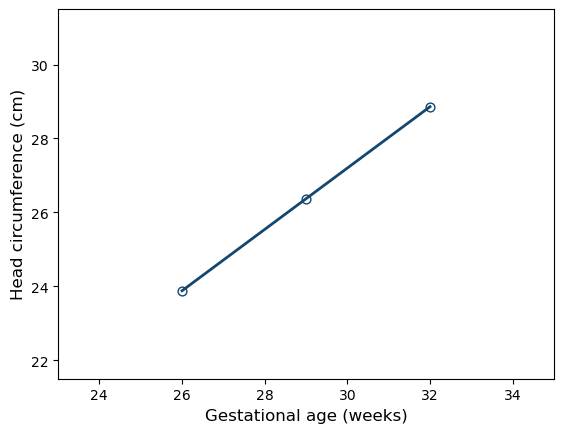

In [5]:
# Example 2: Population regression line

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Enter beta_0 and beta_1
beta_0 = 2.3
beta_1 = 0.83

# Enter min x and max x values
min_x = 26
max_x = 32

# Compute the middle value
mid_x = (min_x + max_x) / 2 

# Generate x, y 
x = np.array([min_x, mid_x, max_x])
y = beta_0 + beta_1 * x

# Create plotting environment
fig, ax = plt.subplots()

# Assign color value
color_1 = '#15466d' # Dark blue

# Plot xy line
ax.plot(x,y,
        linewidth=2,
        alpha = 1,
        color=color_1)

# Plot xy scatter
ax.scatter(x, y, marker="o", 
           s=40,  # marker size
           linestyle='None',
           facecolor='white',        
           alpha = 1,
           edgecolors=color_1)

# Set x and y limits
ax.set(xlim=(23,35))
ax.set(ylim=(21.5,31.5))

# Set the x and y labels
ax.set_xlabel('Gestational age (weeks)', fontsize=12)
ax.set_ylabel('Head circumference (cm)', fontsize=12)

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image35.png)

### **Exercise 2: Population Regression Line**

In the cell below plot the population regression line for the salt/blood pressure dataset stored in the DataFrame `saltDF`.  

_Code Description:_

To generate this figure, you will need to manually enter the following values:

1. y-intercept ($\beta_0$) = `128.61`
2. slope ($\beta_1$) = `1.1969`
3. minimum $x$ value = `1.13`
4. maximum $x$ value = `12.57`

In addition you will need to change the x- and y-limits:
~~~text
# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(125,145))
~~~

Label the x-axis "Salt" and the y-axis "BP".

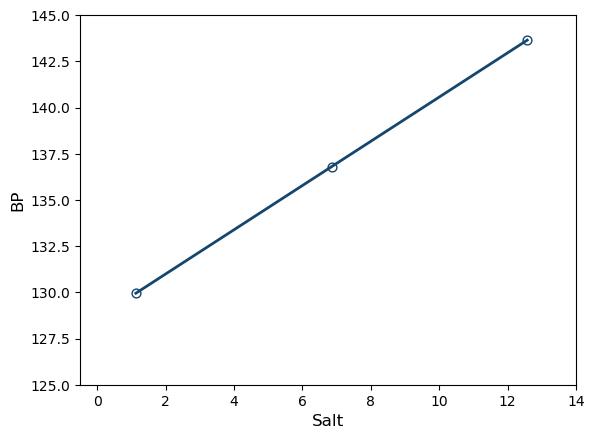

In [6]:
# Insert your code for Exercise 2 here

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Enter beta_0 and beta_1
beta_0 = 128.6
beta_1 = 1.197

# Enter min x and max x values
min_x = 1.13
max_x = 12.57

# Calculate middle value
mid_x = (min_x + max_x) / 2 

# Generate x, y 
x = np.array([min_x, mid_x, max_x])
y = beta_0 + beta_1 * x

# Create plotting environment
fig, ax = plt.subplots()

# Assign color value
color_1 = '#15466d' # Dark blue

# Plot xy line
ax.plot(x,y,
        linewidth=2,
        alpha = 1,
        color=color_1)

# Plot xy scatter
ax.scatter(x, y, marker="o", 
           s=40,   # marker size
           linestyle='None',
           facecolor='white',        
           alpha = 1,
           edgecolors=color_1)

# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(125,145))

# Set the x and y labels
ax.set_xlabel('Salt', fontsize=12)
ax.set_ylabel('BP', fontsize=12)

# Show plot
plt.show()

If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image36.png)

#### **Assumptions for fitting a regression line:**


In a simple linear regression, the coefficients of the population regression line are estimated using a random sample of observations ($x_i, y_i$). Before we attempt to fit such as line, we must make a few assumptions:



1. For a specified value of $( x $), which is considered to have been measured without error, the distribution of the $( y $) values is normal with mean $( \mu_{y|x} $) and standard deviation $( \sigma_{y|x} $). This concept is illustrated in **Figure 17.4**.

2. The relationship between $( \mu_{y|x} $) and $( x $) is described by the straight line
   
$$   \mu_{y|x} = \beta_0 + \beta_1 x. $$

3. For any specified value of $( x $), $( \sigma_{y|x} $) – the standard deviation of the outcomes $( y $) – does not change. This assumption of constant variability across all values of $( x $) is known as **_homoscedasticity_**. It is analogous to the assumption of equal variances in the two-sample $( t $) test or the one-way analysis of variance.

4. The outcomes $( y $) are independent.



![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image05.png)

**FIGURE 17.4** Normality of the outcomes $Y$ for given values of $X$.

## **Method of Least Squares**

The method of least squares is a fundamental statistical technique used to find the best-fitting line or curve for a set of data points by minimizing the sum of the squares of the differences between the observed values and the values predicted by the model. Essentially, it works to reduce the discrepancies between observed data and the predictions made by the model.

#### **How It Works:**
* **Model Specification:** Start with a linear model: $y = \beta_0 + \beta_1 x + \epsilon$
* **Error Calculation:** Compute the error term $\epsilon$ for each data point, which is the difference between the observed $y$ and the predicted $\hat{y}$
* **Minimization:** Find the values of $\beta_0$ and $\beta_1$ that minimize the sum of $\epsilon^2$, the squared differences between observed and predicted values.

#### **Importance in Biostatistics:**

1. **Predictive Analysis:** Helps in predicting outcomes based on predictor variables. For example, predicting disease incidence based on exposure levels.
2. **Understanding Relationships:** Quantifies the strength and nature of relationships between biological variables, such as the effect of a drug on blood pressure.
3. **Statistical Inference:** Provides a framework for hypothesis testing and confidence intervals, aiding in the interpretation of experimental results.
4. **Design of Experiments:** Informs the design and analysis of clinical trials, observational studies, and laboratory experiments.

Here is a two-way scatterplot of the head circumferences versus gestational age for our sample of 100 low weight infants. As you can see, the marker size varies. Changing the marker size is one technique that is used to reveal x,y locations in which there are two (or more) datapoints plotted at the same coordinate. For example the largest marker at gestational age 29 weeks with a head circumference of 27 cm represents 9 unique infants.  

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image10.png)

**FIGURE 17.5**  Head circumference versus gestational age for a sample of 100 low birth weight infants  coefficients of a population regression line using a single sample of measurements. 

### Example 3: Two-Way Scatter Plot

The code in the cell below shows how to recreate **Figure 17.5** using Python.

_Code Decription:_

This code chunk that extracts the `x`, `y` and `count` values as numpy arrays:

~~~text
# Extract x- y-values and counts
x = np.array(headDF['gestage'])
y = np.array(headDF['headcirc'])
counts = np.array(headDF['count'])
~~~

This dataset is rather unusual in having a separate column (`count`) containing the number of times a particular gestational age/head circumference measurement was repeated. 

Here is the line of code that uses the `count` value to increase the size of the marker:

~~~text
scatter = ax.scatter(x,y, s=counts*20, facecolor='white', edgecolor=color_1)
~~~

The argument `s` species the marker size. The default marker size = `20` when `count` = `1` for a particular x,y pair. The marker size is increased by a factor of `20` for each additional count. 

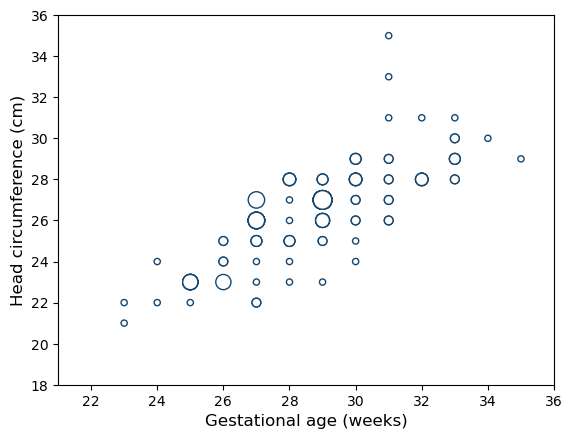

In [7]:
# Example 3: Two-Way Scatter Plot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract x- y-values and counts
x = np.array(headDF['gestage'])
y = np.array(headDF['headcirc'])
counts = np.array(headDF['count'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Create plotting environment
fig, ax = plt.subplots()

# Assign values
color_1 = '#15466d' # Dark blue

# Create the scatter plot with varying marker size
scatter = ax.scatter(x,y, s=counts*20, facecolor='white', edgecolor=color_1)

# Set x and y limits
ax.set(xlim=(21,36))
ax.set(ylim=(18,36))

# Adding labels
# Set the x and y labels
ax.set_xlabel('Gestational age (weeks)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image24.png)

### **Exercise 3: Two-Way Scatter Plot**

In the cell below create of two-way scatter plot of the salt/blood pressure data using Python. The independent variable ($x$) should be salt consumption (`salt`) with the dependent variable ($y$) blood pressure (`BP`).

Since the `saltDF` DataFrame doesn't have a `count` column, you will need to comment-out or erase it when extracting the x and y values. You will also have to change the plotting code so that `s=50` has a fixed value. 

~~~text
# Create scatter plot with fixed marker size
scatter = ax.scatter(x,y, s=50, facecolor='white', edgecolor=color_1)
~~~

Set your x and y limits to:

~~~text
# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(125,150))
~~~

Finally, label your x-axis `"Salt"` and the y-axis `"BP"`.


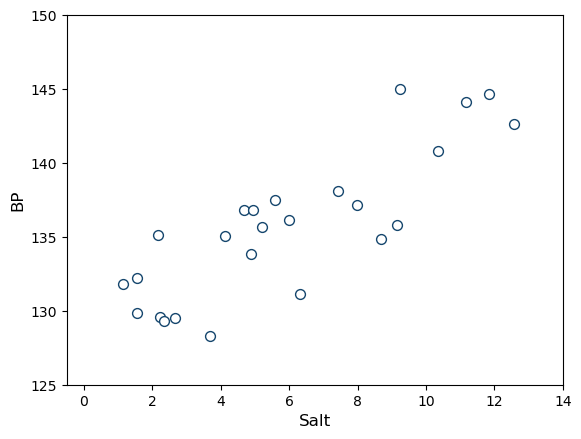

In [8]:
# Insert your code for Exercise 3 here

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract x- y-values and counts
x = np.array(saltDF['salt'])
y = np.array(saltDF['BP'])
#counts = np.array(bwtDF['count'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Create plotting environment
fig, ax = plt.subplots()

# Assign values
color_1 = '#15466d' # Dark blue

# Create scatter plot with fixed marker size
scatter = ax.scatter(x,y, s=50, facecolor='white', edgecolor=color_1)

# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(125,150))

# Set the x and y labels
ax.set_xlabel('Salt', fontsize=12)
ax.set_ylabel('BP', fontsize=12)

# Display the plot
plt.show()


If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image38.png)

From visual inspection you should see that there is an obvious positive correlation between salt intake (independent variable) and blood pressure (dependent variable).

### **Draw an Arbitrary Line**

It is probably a natural impulse to want to draw a line through the data points in **Figure 17.5** as a way to visualize the relationship between gestational age (x, the independent variable) and head circumference (y, the dependent variable). One possible "arbitrary" line is shown in **Figure 17.6** taken from page 406 in your textbook.  

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image11.png)

**FIGURE 17.6**  Arbitrary line depicting a relationship between head circumference and gestational age

### Example 4: Two-Way Scatter Plot with Line

The code in the cell below shows how to recreate **Figure 17.6** using Python.

_Code Decription:_

Here is the code chunk that adds an "arbitrary line" 

~~~text
# Adding a line to the plot
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='k', linestyle='-')
~~~
This command is doing quite a bit of work to add a regression line to a plot. Let me break it down for you:

1. `np.polyfit(x, y, 1)`:
* Fits a polynomial of degree 1 (a straight line) to the data points (x, y).
* Returns the coefficients of the best-fit line.

2. `np.poly1d(...)`:
* Creates a polynomial function with the coefficients found by np.polyfit().
3. `np.unique(x):`
* Returns the sorted unique elements from array x.
* Ensures that the x-values used for plotting are unique and sorted.

4. `np.poly1d(...)(np.unique(x))`:
* Evaluates the polynomial function at each of the unique x-values.

5. `ax.plot(..., color='k', linestyle='-')`:
* Plots the evaluated polynomial function (regression line) on the existing axis ax.
* The line is black (color='k') and solid (linestyle='-').


Here is the code that creates the shorter, vertical line at the right of the main line:

~~~text
# Define line coord
x_line=[35, 35]
y_line=[31.16, 29.2]

# Plot line
plt.plot(x_line,y_line,
         color='k', 
         linestyle='solid', 
         linewidth=1.0)
~~~

Finally, here is the code that adds the labels and short lines to the vertical line:

~~~text
# Adding labels
ax.set_xlabel('Gestational age (weeks)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Plot text 
plt.text(34.25, 32, '($x_i$,$y_i$)', fontsize=12)
plt.text(34.25, 28., '($x_i$,$y_i$)', fontsize=12)
~~~

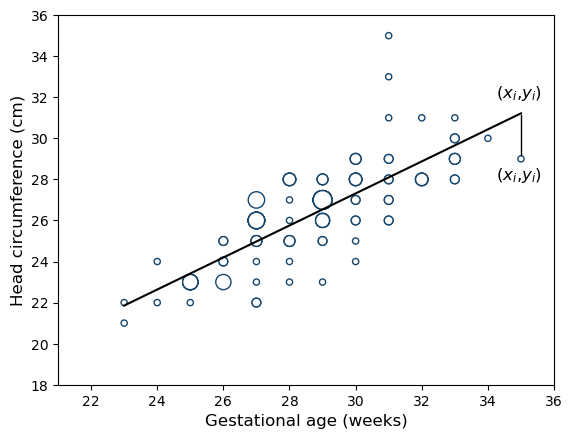

In [9]:
# Example 4: Two-Way Scatter Plot with Line

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assign values
color_1 = '#15466d' # Dark blue

# Extract x- y-values
x = np.array(headDF['gestage'])
y = np.array(headDF['headcirc'])
counts = np.array(headDF['count'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Create the scatter plot with varying marker sizes
fig, ax = plt.subplots()
scatter = ax.scatter(x,y, s=counts*20, facecolor='white', edgecolor=color_1)

# Adding labels
# Set the x and y labels
ax.set_xlabel('Gestational age (weeks)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Adding a line to the plot
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='k', linestyle='-')

# Set x and y limits
ax.set(xlim=(21,36))
ax.set(ylim=(20,36))

# Define line coord
x_line=[35, 35]
y_line=[31.16, 29.2]

# Plot line
plt.plot(x_line,y_line,
         color='k', 
         linestyle='solid', 
         linewidth=1.0)

# Set x and y limits
ax.set(xlim=(21,36))
ax.set(ylim=(18,36))

# Adding labels
ax.set_xlabel('Gestational age (weeks)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Plot text 
plt.text(34.25, 32, '($x_i$,$y_i$)', fontsize=12)
plt.text(34.25, 28., '($x_i$,$y_i$)', fontsize=12)

# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image25.png)

### **Exercise 4: Two-Way Scatter Plot with Line**

In the cell below create a two-way scatter plot with an arbitrary line for the salt/blood pressure data in the DataFrame `saltDF` using Python.

_Code Hints:_

For the most part, you can reuse your code from **Exercise 3**. 

Use the same code chunk from Example 4 to add an "arbitrary line" to your plot:

~~~text
# Adding a line to the plot
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='k', linestyle='-')
~~~

This should be the only line you add. Don't add the small vertical line and the text. Your plot should only have a single line at an approximately 45 degree angle.

Finally, here is the code for the x-, y-limits and titles.

~~~text
# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(125,150))

# Set the x and y labels
ax.set_xlabel('Salt', fontsize=12)
ax.set_ylabel('BP', fontsize=12)
~~~

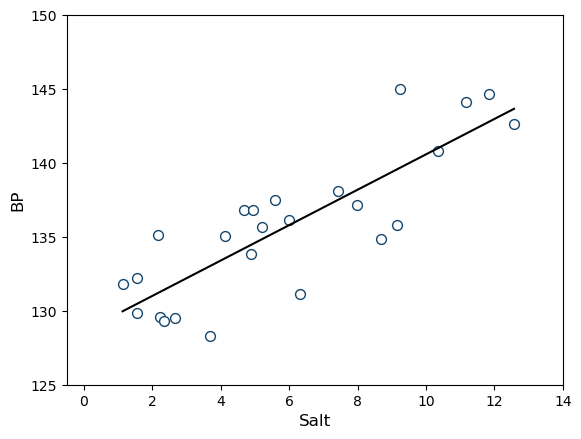

In [10]:
# Insert your code for Exercise 4 here

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Extract x- y-values
x = np.array(saltDF['salt'])
y = np.array(saltDF['BP'])
#counts = np.array(headDF['count'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Create plotting environment
fig, ax = plt.subplots()

# Assign color value
color_1 = '#15466d' # Dark blue

# Create the scatter plot with a fixed marker size 
scatter = ax.scatter(x,y, s=50, facecolor='white', edgecolor=color_1)

# Adding labels
# Set the x and y labels
ax.set_xlabel('Gestational age (weeks)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Adding a line to the plot
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='k', linestyle='-')

# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(125,150))

# Set the x and y labels
ax.set_xlabel('Salt', fontsize=12)
ax.set_ylabel('BP', fontsize=12)

# Display the plot
plt.show()


If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image39.png)

### **Line of Best Fit**

Rather than draw an 'arbitrary' line using our eye, it would be much better to let our computer figure out the very **_best_** line that can be drawn thorough our data points. 

The **_line of best fit_**, also known as the _regression line_, is a straight line that best represents the data on a scatter plot. It minimizes the distances (residuals) between the observed data points and the line itself, effectively summarizing the relationship between the variables. In statistics, it's derived using the **_ordinary least squares (OLS)_** method, making it a crucial tool for predicting future data points and understanding trends in data. 

## **Ordinary Least Squares (OLS) method**

When performing linear regression analysis with Python, the `statsmodels.api` can be used. The `statsmodels.api` package is a powerful Python library designed for statistical modeling and hypothesis testing. It's widely used by data analysts and researchers to build and evaluate statistical models. Here are the key features:

#### **Key Features:**

* **Linear Regression:** Functions for ordinary least squares (OLS) and other types of regression models.
* **Time Series Analysis:** Tools for analyzing time series data, including ARIMA and state space models.
* **ANOVA:** Analysis of variance techniques.
* **Generalized Linear Models (GLM):** For modeling relationships between variables with different types of distributions.
* **Statistical Tests:** Hypothesis tests such as t-tests, chi-square tests, and other

In Example 4, we will be using the OLS function from this package to perform a regression analysis on the head circumference/gestational age data. 

### Example 5: Perform Ordinary Least Squares (OLS)

The code in the cell below shows how to perform an **_Ordinary Least Squares (OLS)_** analysis on the head circumference dataset in the DataFrame `headDF` using the `statsmodel.api`.

In [11]:
# Example 4: Perform OLS

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Extract x- y-values
x = np.array(headDF['gestage'])
y = np.array(headDF['headcirc'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit regression model
X = sm.add_constant(df['x'])  # Adds a constant term to the predictor
model = sm.OLS(df['y'], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           1.00e-21
Time:                        14:17:57   Log-Likelihood:                -187.28
No. Observations:                 100   AIC:                             378.6
Df Residuals:                      98   BIC:                             383.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9143      1.829      2.140      0.0

If the code is correct, you should see the following output:

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     152.9
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.00e-21
Time:                        18:40:07   Log-Likelihood:                -187.28
No. Observations:                 100   AIC:                             378.6
Df Residuals:                      98   BIC:                             383.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9143      1.829      2.140      0.035       0.284       7.544
x              0.7801      0.063     12.367      0.000       0.655       0.905
==============================================================================
Omnibus:                       23.475   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.083
Skew:                           0.849   Prob(JB):                     2.97e-12
Kurtosis:                       6.140   Cond. No.                         334.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~

As you can see, the complete summary for an OLS model is quite detailed. 

#### **Key Sections:**

##### **Coefficients Table:**

* **coef:** These are the estimated coefficients for each predictor variable. They represent the change in the dependent variable for a one-unit change in the predictor variable.
* **std err:** This is the standard error of the coefficient estimates. It gives an indication of the variability of the estimates.
* **t:** This is the t-statistic for the coefficient. It is calculated as the coefficient divided by its standard error.
* **P>|t|:** This is the p-value for the t-test of the null hypothesis that the coefficient is equal to zero. A low p-value (typically < 0.05) indicates that the coefficient is significantly different from zero.
* **[0.025 0.975]:** These are the 95% confidence intervals for the coefficient estimates.

##### **Model Statistics:**

* **R-squared:** This is the proportion of variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.
* **Adj. R-squared:** This is the adjusted R-squared, which takes into account the number of predictors in the model. It is a more accurate measure of goodness of fit when multiple predictors are involved.
* **F-statistic:** This tests the overall significance of the model. It compares the model with no predictors to the specified model. A high F-statistic and a low p-value indicate that the model is significant.

##### **Summary Statistics:**

* **Prob (F-statistic):** The p-value associated with the F-statistic. It indicates the probability that the observed F-statistic would occur by chance if the null hypothesis were true.
* **Log-Likelihood:** This is the log of the likelihood function evaluated at the estimated coefficients. It is used in comparing models.
* **AIC (Akaike Information Criterion):** A measure of the relative quality of a statistical model. Lower values indicate a better model.
* **BIC (Bayesian Information Criterion):** Similar to AIC, but it includes a penalty term for the number of predictors in the model. Lower values indicate a better model.

### **Exercise 5: Perform Ordinary Least Squares (OLS)**

In the cell below write the Python code to perform an Ordinary Least Squares (OLS) analysis on the salt/blood pressure dataset in the DataFrame `saltDF` using the `statsmodel.api`.

In [12]:
# Insert your code for Exercise 5 here

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Extract x- y-values
x = np.array(saltDF['salt'])
y = np.array(saltDF['BP'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit regression model
X = sm.add_constant(df['x'])  # Adds a constant term to the predictor
model = sm.OLS(df['y'], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     54.59
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           1.63e-07
Time:                        14:17:57   Log-Likelihood:                -59.679
No. Observations:                  25   AIC:                             123.4
Df Residuals:                      23   BIC:                             125.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.6164      1.102    116.723      0.0

If your code is correct, you should see the following output:

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     54.59
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.63e-07
Time:                        09:25:11   Log-Likelihood:                -59.679
No. Observations:                  25   AIC:                             123.4
Df Residuals:                      23   BIC:                             125.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.6164      1.102    116.723      0.000     126.337     130.896
x              1.1969      0.162      7.389      0.000       0.862       1.532
==============================================================================
Omnibus:                        0.432   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.565
Skew:                          -0.226   Prob(JB):                        0.754
Kurtosis:                       2.419   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~

From the model summary you can see that the two coefficients needed to construct an the linear model:

* `cont 128.6164` is the y-intercept ($\beta_0$)
* `x` is the slope value ($\beta_1$)

For the salt/blood pressue data, then, the linear mode would be:

$$ y = 128.6164 + 1.1969 x $$

We also know from the `R-squared: 0.704` that this model accounts for about 70% of the differences in the y-values. 

### **Adding a Regression Line to a Two-Way Scatter Plot**

When creating a two-way scatterplot, it is common to add the **_line of best fit_** or _regression line_, especially if the data appears to have a linear relationship. **Figure 17.7** is an example of a two-way scatter plot with a regrssion line added. For Example 6 we will recreate this figure by _manually_ creating the line from its coefficients. 



![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image12.png)

**FIGURE 17.7**  Least squares regression of head circumference on gestational age,  $\hat{y} = 3.9143 + 0.7801x$ 

### Example 6: Manually Adding a Regression Line

The code in the cell below adds a regression line to a two-way scatter plot. In this example, the regression line is added by manually entering values for the y-intercept ($\beta_0$) and the slope ($\beta_1)$. The code recreates **Figure 17.7**, manually adding the regression line

$$\hat{y} = 3.9143 + 0.7801x$$

The appropiate values can be found in the summary output in Example 4:

~~~text
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9143      1.829      2.140      0.035       0.284       7.544
x              0.7801      0.063     12.367      0.000       0.655       0.905
~~~

_Code Description:_

The code for generating the basic two-way scatter plot is the same as that used previously in Examples 3 and 4.

Here is the code chunk that generates the x values, `line_x`, for the regression line:

~~~text
# Generate x-values for regression line
line_x = np.linspace(x.min(), x.max(), 10)
~~~

The x-values for the regression line are generated by the numpy function `linspace()`. `numpy.linspace` is a powerful tool for generating evenly spaced values over a specified range. Here's how it works:

1. **start:** The starting value of the sequence.
2. **stop:** The end value of the sequence.
3. **num:** The number of values to generate.

By setting **start** = `x.min(x)` and **stop** = `x.max()` our regression line will start at the smallest x-value and end with the largest x-value.

Once we have defined the `x-line` values, we can compute the `line_y` values using this code chunk: 

~~~text
# Generate a y-value for each x-value
line_y = beta_0 + beta_1 * line_x
~~~

For each `line_x` value, the equation computes the corresponding `line_y` value.

The regression line is plotted with this code chunk:

~~~text
# Plot regression line
ax.plot(line_x,line_y, c='k')
~~~

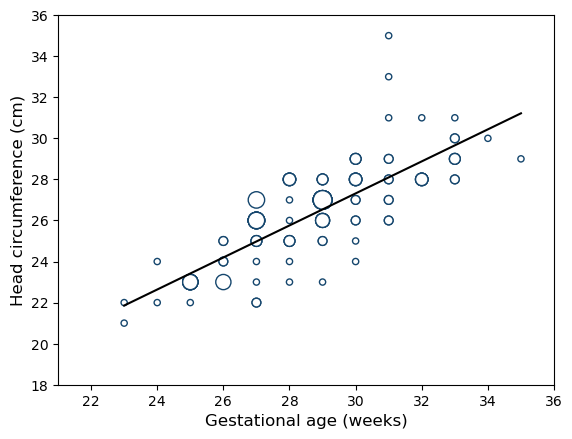

In [13]:
# Example 6: Manually Adding a Regression Line

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Manually enter coefficients from Example 5
beta_0 = 3.9143
beta_1 = 0.7801

# Extract x- y-values
x = np.array(headDF['gestage'])
y = np.array(headDF['headcirc'])
counts = np.array(headDF['count'])

# Generate x-values for regression line
line_x = np.linspace(x.min(), x.max(), 10)

# Generate a y-value for each x-value
line_y = beta_0 + beta_1 * line_x
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Define color from textbook
color_1 = '#15466d' # Dark blue

# Create the scatter plot with varying marker sizes
fig, ax = plt.subplots()
scatter = ax.scatter(x,y, s=counts*20, facecolor='white', edgecolor=color_1)

# Plot regression line
ax.plot(line_x,line_y, c='k')

# Set x and y limits
ax.set(xlim=(21,36))
ax.set(ylim=(18,36))

# Adding labels
# Set the x and y labels
ax.set_xlabel('Gestational age (weeks)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image26.png)

### **Exercise 6: Manually Adding a Regression Line**

In the cell below, add a regression line to a two-way scatter plot of your salt/blood pressure data. Manually enter the coefficients for the y-intercept ($\beta_0$) and the slope ($\beta_1)$ that you calculated in **Exercise 5**.

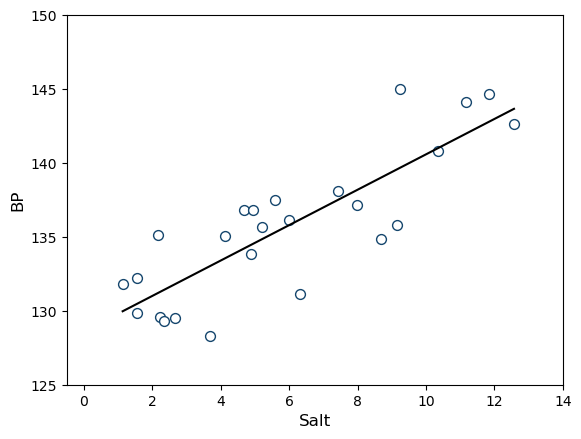

In [14]:
# Example 6: Manually Adding a Regression Line

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#------------------------------------------------------------------------------
#const        128.6164      1.102    116.723      0.000     126.337     130.896
#x              1.1969

# Manually enter coefficients from Example 4
beta_0 = 128.6164
beta_1 = 1.1969

# Extract x- y-values and counts
x = np.array(saltDF['salt'])
y = np.array(saltDF['BP'])

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Generate x-values for regression line
line_x = np.linspace(x.min(), x.max(), 10)

# Generate a y-value for each x-value
line_y = beta_0 + beta_1 * line_x
             
# Create plotting environment
fig, ax = plt.subplots()

# Assign values
color_1 = '#15466d' # Dark blue

# Create scatter plot with fixed marker size
scatter = ax.scatter(x,y, s=50, facecolor='white', edgecolor=color_1)

# Plot regression line
ax.plot(line_x,line_y, c='k')

# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(125,150))

# Set the x and y labels
ax.set_xlabel('Salt', fontsize=12)
ax.set_ylabel('BP', fontsize=12)

# Display the plot
plt.show()


If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image40.png)



![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image14.png)

## **Inference for Predicted Values**  

In addition to making inference about the population slope and intercept, we might also be interested in using the least squares regression line to estimate the mean value of y corresponding to a particular value of x, and to construct a 95% confidence interval for this mean. If we have a sample of 100  observations, for instance, the confidence interval will take the form  

(yˆ − 1.98 seD(yˆ), yˆ + 1.98 seD(yˆ))  

where ˆy is the predicted mean of the normally distributed outcomes, and the standard error of ˆy is  estimated by  

seD(yˆ) = sy |x s" 1  n  + (x − x¯) 2  Pn i=1 (xi − x¯) 2 #.  

Note the term (x − x¯) 2 in the formula for the standard error. This quantity takes the value 0 when  x is equal to ¯x, and gets larger as x moves farther and farther away. As a result, if x is near  ¯x, the  confidence interval is relatively narrow. It grows wider as x moves away from ¯x. Intuitively, we are  more confident about the mean value of the response when we are closer to the mean value of the  explanatory variable.  

Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 410). CRC Press. Kindle Edition. 

## **95% Confidence Limits**

Your textbook discusses two ways you can add confidence limits to a two-ways scatter plot. **Figure 17.9** shows 95% confidence limits on individual predicted $y$ for a given $x$. The confidence limits are curved, not straight. Confidence limits around a regression line are curved because they reflect the variability of the predicted values, which **_increases_** as you move away from the mean of the predictor variables. In essence, the farther you get from the center of your data, the less certain your predictions become, leading to those characteristic curves. It's all about accounting for the underlying uncertainty in your model's predictions. 



![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image22.png)

**Figure 17.9** The 95% confidence limits on an individual predicted $y$ for a given value of $x$.

### Example 7: Adding Confidence Limits to the Regression Line

The code in the cell below recreates **Figure 17.9** by adding 95% confidence limits. 

_Code Description:_

In order to add confidence intervals, it is first necessary to perform a OLS analysis to generate a `model`:

~~~text
# Generate OLS model
X = sm.add_constant(x)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
~~~

The model is used to generate the y-values for the regression line with this code chunk:
~~~text
line_y = model.predict(X)
~~~

The model is then used to generate the confidence intervals using this code chunk:

~~~text
# Calculate confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(model)
~~~
This line of code calculates the standard error and the prediction intervals for the weighted least squares (WLS) regression model. Breaking it down:

* **prstd:** Standard error of the prediction.
* **iv_l:** Lower bound of the prediction interval.
* **iv_u:** Upper bound of the prediction interval.

These values are then added to the plot with this line of code:
~~~text
# Plot confidence intervals
ax.plot(df['x'],iv_l,color='k', linewidth=1)
ax.plot(df['x'],iv_u,color='k', linewidth=1)
~~~

In this example, the coefficients for the regression were calculated **_automatically_** as part of the OLS model so there's no need to enter them manually. Here is the code chunk that plots the regression line:

~~~text
# Plot regression line
plt.plot(x, line_y, color='k')
~~~

As stated above, the variable `line_y` contains the y-values for the regression line.

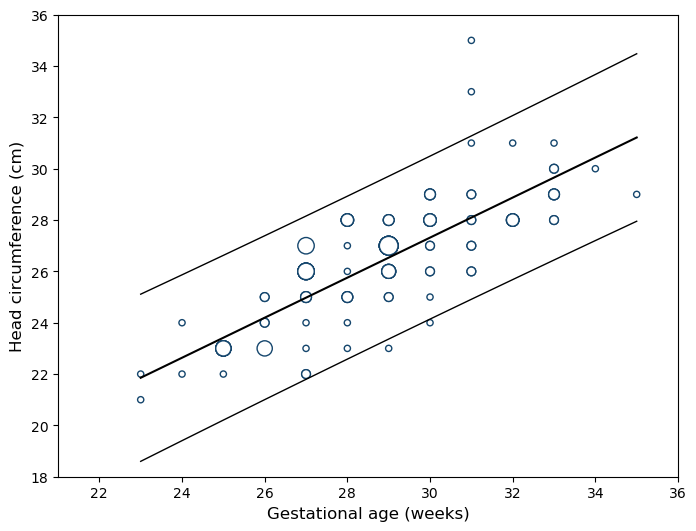

In [15]:
# Example 7: Adding Confidence Limits to the Regression Line

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Extract x- y-values
x = np.array(headDF['gestage'])
y = np.array(headDF['headcirc'])
counts = np.array(headDF['count'])

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Generate OLS model
X = sm.add_constant(x)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Generate y-values for regression line
line_y = model.predict(X)

# Calculate confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(model)

# Create plotting environment
fig, ax = plt.subplots(figsize=(8, 6))

# Assign color value
color_1 = '#15466d' # Dark blue

# Plot scatter plot
ax.scatter(df['x'], df['y'], 
           s=counts*20,
           facecolor='white', 
           edgecolor=color_1)

# Plot regression line
plt.plot(x, line_y, color='k')

# Plot confidence intervals
ax.plot(df['x'],iv_l,color='k', linewidth=1)
ax.plot(df['x'],iv_u,color='k', linewidth=1)

# Set x and y limits
ax.set(xlim=(21,36))
ax.set(ylim=(18,36))

# Adding labels
ax.set_xlabel('Gestational age (weeks)',fontsize=12)
ax.set_ylabel('Head circumference (cm)',fontsize=12)

# Display the plot
plt.show()

If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image21.png)

You should note that there is one value that is below the lower 95% confidence limit and two values that are outside of the upper 95% confidence limit. Since we are the are 100 infants in this sample, the **_Emprical Rule_** tells us to expect at least one value outside of the confidence limits. Howerver, the two values above the upper limit (gestational age = 31) appear to be **_outliers_**. An _outlier_ is a data point that diverges markedly from the overall pattern of data. In statistics, outliers can significantly affect the results of an analysis. They may indicate variability in measurements, errors in data collection, or the presence of a novel, previously unnoticed phenomenon. Identifying and handling outliers is crucial as they can skew data analysis, leading to potentially misleading conclusions.  

### **Exercise 7: Adding Confidence Limits to the Regression Line**

In the cell below, write the code to add 95% confidence limits to your two-way scatter plot of the salt/blood pressure data. 

_Code Hints:_

Here are the x- and y-limits:

~~~text
# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(120,155))
~~~

These limits expand the plot so the ends of the 95% confidence limits are visible.

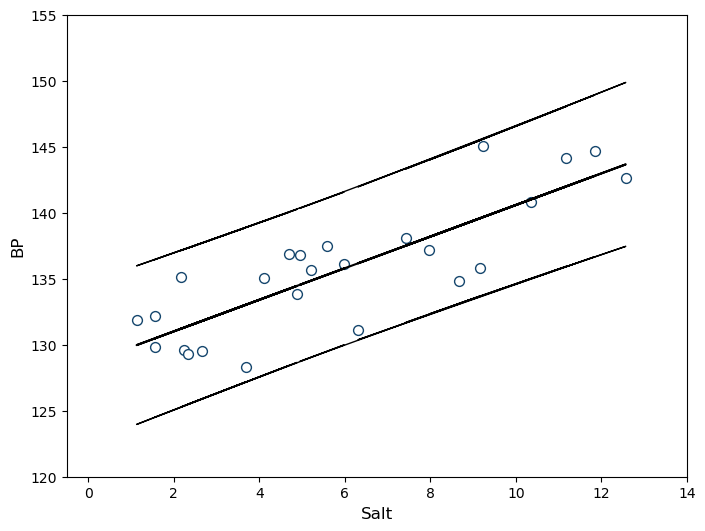

In [16]:
# Insert your code for Exercise 7 here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Extract x- y-values
x = np.array(saltDF['salt'])
y = np.array(saltDF['BP'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Generate OLS model
X = sm.add_constant(x)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Generate y-values for regression line
line_y = model.predict(X)

# Calculate confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(model)

# Create plotting environment
fig, ax = plt.subplots(figsize=(8, 6))

# Assign color value
color_1 = '#15466d' # Dark blue

# Plot scatter plot
ax.scatter(df['x'], df['y'], 
           s=50,
           facecolor='white', 
           edgecolor=color_1)

# Plot regression line
ax.plot(x,line_y,color='k')

# Plot confidence intervals
ax.plot(df['x'],iv_l,color='k', linewidth=1)
ax.plot(df['x'],iv_u,color='k', linewidth=1)

# Set x and y limits
ax.set(xlim=(-0.5,14))
ax.set(ylim=(120,155))

# Set the x and y labels
ax.set_xlabel('Salt', fontsize=12)
ax.set_ylabel('BP', fontsize=12)

# Display the plot
plt.show()


If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image41.png)

## **Evaluation of the Model**  

After generating a least squares regression line represented by  $\hat{y} = \hat\beta_0 + \hat\beta_1x$,  we might wonder how well this model actually fits the observed data. Is it a good model? There are  several methods available to help evaluate the fit of a linear regression model. 

### **Coefficient of Determination** 

One way to get a sense of the fit is to compute the coefficient of determination. The coefficient of determination is represented by $R^2$, and is the square of the Pearson correlation coefficient $r$ between $Y$ and $X$; consequently,  $r^2 = R^2$.  Since _r_ can assume any value in the range −1 to 1, $R^2$ must lie between 0 and 1. If $R^2$ = 1, all  of the data points in the sample fall directly on the least squares line. If $R^2$ = 0, there is no linear  relationship between x and y. The coefficient of determination can be interpreted as the proportion of the variability among the observed values of $y$ that is explained by the linear regression of $y$ on $x$. This interpretation derives from the relationship between $\sigma_y $, the standard deviation of the outcomes of the response variable $Y$, and $\sigma_y |x$, the standard deviation of $y$ for a specified value of the explanatory variable $X$, that was presented in Section 17.1:  

From the relationship between $(\sigma_{y|x}$), the standard deviation of the outcomes of the response variable $(Y$), and $(\sigma_{y|x}$), the standard deviation of $(y$) for a specified value of the explanatory variable $(X$), that was presented in Section 17.1:

$$\sigma_{y|x}^2 = (1 - \rho^2) \sigma_y^2. $$

Recall that ($\rho$) is the correlation between $(X$) and $(Y$) in the underlying population. If we replace \(\sigma_y\) and \(\sigma_{y|x}\) by their estimators – the sample standard deviations $(s_y$) and $(s_{y|x}$) – and $(\rho$) by the Pearson correlation coefficient $(r$), we have

$$
s_{y|x}^2 = (1 - r^2) s_y^2 = (1 - R^2) s_y^2.
$$

Solving this equation for $(R^2$),

$$
R^2 = 1 - \frac{s_{y|x}^2}{s_y^2} = \frac{s_y^2 - s_{y|x}^2}{s_y^2}.
$$

Since $( s^2_{y|x} $) is the variation in the $( y $) values that still remains after accounting for the linear relationship between $( y $) and $( x $), $( s^2_y - s^2_{y|x} $) must be the variation in $( y $) that is explained by this relationship. Thus, $( R^2 $) is the proportion of the total observed variability among the $( y $) values that is explained by the linear regression of $( y $) on $( x $).

For the regression of head circumference on gestational age, the coefficient of determination can be shown to be

$$ R^2 = 0.6095.$$


### Example 8: Compute $R^2$

The code in the cell below uses the function `sm.OLS()` from the `statsmodels` library in Python for performing ordinary least squares (OLS) regression. We will use Python to calculate the regression of head circumference on gestational age and see if we get the same value for $R^2 = 0.6095.$

_Code Description:_

Here is an explanation of the code:

* **Import Libraries:** `statsmodels.api` for OLS regression, numpy and pandas for data handling.
* **Extract Data:** Extract x- and y-values from DataFrame.
* **Create DataFrame:** Creates a DataFrame to hold the extracted x- and y-values
* **Add Constant:** `sm.add_constant(df['x'])` adds an intercept term to the model.
* **Fit the Model:** `sm.OLS(df['y'], X).fit()` fits the OLS model to the data. The `.fit()` method performs the regression.
* **Extract Results:** `model.summary()` provides a detailed summary of the model, including coefficients, R-squared value, p-values, and more.
* **Extract R-squared value:** `r_squared = model.rsquared` instead of printing out the entire summary, you can use this method to extract selective items such as $R^2$. 

In [17]:
# Example 8; Compute r-squared 

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Extract x- y-values
x = np.array(headDF['gestage'])
y = np.array(headDF['headcirc'])
             
# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit regression model
X = sm.add_constant(df['x'])  # Adds a constant term to the predictor
model = sm.OLS(df['y'], X).fit()

# Extract R-squared value
r_squared = model.rsquared

# Print header
print("-----Computing R\2\u00B2 -----------------------------")

# Print R-squared value
print(f"R\2\u00B2: {r_squared:.4f}")
print(" ")


-----Computing R² -----------------------------
R²: 0.6095
 


If the code is correct, you should see the following output:
~~~text
-----Computing R² -----------------------------
R²: 0.6095
~~~

### **Exercise 8: Compute $R^2$**

In the cell below, compute the value for $R^2$ for the salt/blood pressure dataset.  

In [18]:
# Insert your code for Exercise 8 here

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Extract x- y-values
x = np.array(saltDF['salt'])
y = np.array(saltDF['BP'])
             
# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit regression model
X = sm.add_constant(df['x'])  # Adds a constant term to the predictor
model = sm.OLS(df['y'], X).fit()

# Extract R-squared value
r_squared = model.rsquared

# Print header
print("-----Computing R\2\u00B2 -----------------------------")

# Print R-squared value
print(f"R\2\u00B2: {r_squared:.4f}")
print(" ")


-----Computing R² -----------------------------
R²: 0.7036
 


If your code is correct, you should see the following output:
~~~text
-----Computing R² -----------------------------
R²: 0.7036
~~~

It should be noted that you have already computed $R^2$ for this dataset in **Exercise 5** which was shown in the top line of the summary printout:

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704

~~~

What this example illustrates is how you can extract individual regression values from the `model`. For example, the $R^2$ value was accessed above by the code chunk:

~~~text
# Extract R-squared value
r_squared = model.rsquared
~~~

Here is a summary of several key values and statistics that can be extracted from a fitted OLS (Ordinary Least Squares) model in statsmodels:

##### **Parameters:**
* **model.params:** The estimated coefficients.

##### **Standard Errors:**
* **model.bse:** The standard errors of the estimated coefficients.

##### **P-values:**
* **model.pvalues:** The p-values for the hypothesis tests of each coefficient.

##### **R-squared:**
* **model.rsquared:** The coefficient of determination.
* **model.rsquared_adj:** Adjusted R-squared.

##### **F-statistic:**
* **model.fvalue:** The F-statistic of the overall significance of the model.
* **model.f_pvalue:** The p-value associated with the F-statistic.

##### **Predictions:**
* **model.predict():** Predicted values of the model.

##### **Residuals:**
* **model.resid:** Residuals of the model.

##### **Variance-Covariance Matrix:**
* **model.cov_params():** The variance-covariance matrix of the estimated coefficients.

##### **Log-Likelihood:**
* **model.llf:** The log-likelihood of the model.

##### **AIC and BIC:**
* **model.aic:** Akaike Information Criterion.

* **model.bic:** Bayesian Information Criterion.




![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image16.png)

## **Residual Plots**  

Another strategy for evaluating how well the least squares regression line fits the observed data in  the sample used to construct it – focusing in particular on whether the assumptions of the linear  model are met – is to generate a two-way scatter plot of the **_residuals against the fitted values_** of the response variable. **Figure 17.10** on page 415 shows this type of plot. 

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image28.png)

**FIGURE 17.10** Residuals versus fitted values of head circumference.

### Example 9: Residual Plot

The code in the cell below recreates **Figure 17.10** using Python. 

_Code Description:_

To obtain the fitted-values for the head circumference and their corresponding residual value, we need to perform an `OLS()` analysis using this code chunk:

~~~text
# Fit regression model
X = sm.add_constant(df['x'])  # Adds a constant term to the predictor
model = sm.OLS(df['y'], X).fit()
~~~

Once we have generated the variable `model`, we can extract from it the information we need for our two-way scatter plot using this code chunk:

~~~text
# Compute fitted values for y from model
fitted_y = model.predict(X)
~~~

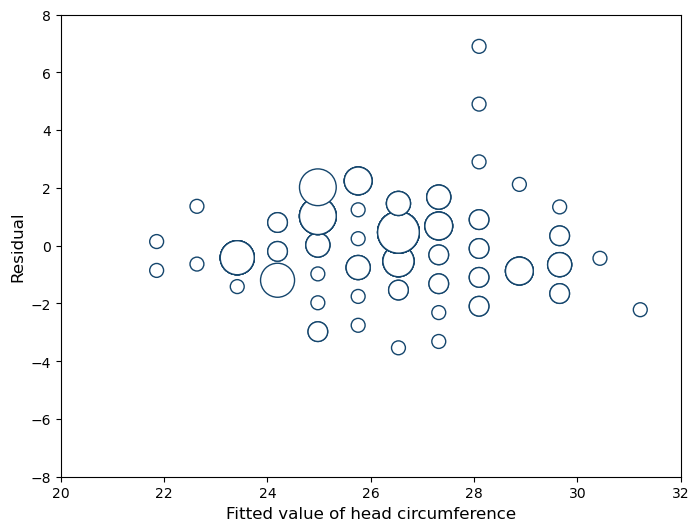

In [19]:
# Example 9: Residual Plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Extract x- y-values
x = np.array(headDF['gestage'])
y = np.array(headDF['headcirc'])
counts = np.array(headDF['count'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit regression model
X = sm.add_constant(df['x'])  # Adds a constant term to the predictor
model = sm.OLS(df['y'], X).fit()

# Compute fitted values for y from model
fitted_y = model.predict(X)

# Compute residual by substraction
residuals = df['y'] - fitted_y

# Create plotting environment
fig, ax = plt.subplots(figsize=(8, 6))

# Assign color value
color_1 = '#15466d' # Dark blue

# Plot residuals
ax.scatter(fitted_y, residuals, 
           s=counts*100,
           facecolor='white', 
           edgecolor=color_1)

# Set x and y limits
ax.set(xlim=(20,32))
ax.set(ylim=(-8,8))

# Add labels
ax.set_xlabel('Fitted value of head circumference', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

# Show the plot
plt.show()

If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image42.png)

A plot of the residuals serves three purposes. First, it can help us to detect outlying observations in the sample. In Figure **17.10**, one residual in particular is somewhat larger than the others; this point is associated with a child whose gestational age is 31 weeks and whose head circumference is 35 cm. We would predict the infant’s head circumference to be only

$$ \hat{y} = 3.914 + 0.7801 \times 31 = 28.10 \, \text{cm.} $$

The method of least squares can be very sensitive to such outliers in the data, especially if they correspond to relatively large or relatively small values of $x$. When it is believed that an outlier is the result of an error in measuring or recording a particular observation, removal of this point improves the fit of the regression line. However, care must be taken not to throw away unusual data points that are in fact valid; these observations might be the most interesting ones in the data set.

### **Exercise 9: Residual Plot**

In the cell below create a residual plot for the salt/blood pressure dataset. 

_Code Hints:_

1. Set the size argument `s=100` for the `ax.scatter()` command.
2. Comment out the x- and y-limits. This will let `Matplotlib` select its own values.
3. Change the x-label to 'Fitted BP values'

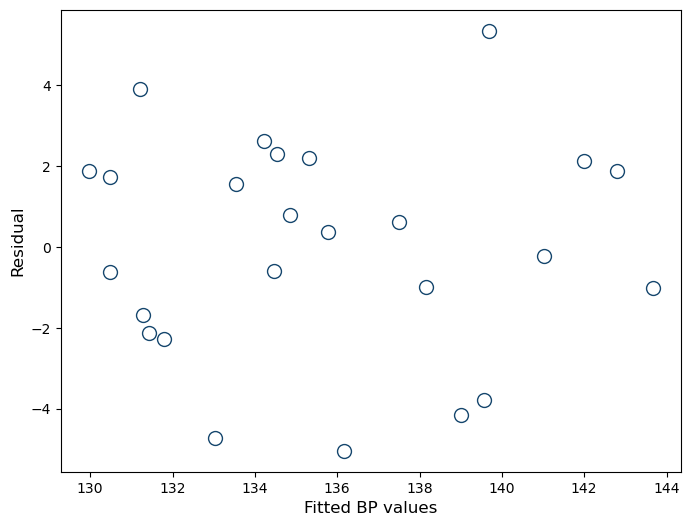

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Extract x- y-values
x = np.array(saltDF['salt'])
y = np.array(saltDF['BP'])
#counts = np.array(headDF['count'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit regression model
X = sm.add_constant(df['x'])  # Adds a constant term to the predictor
model = sm.OLS(df['y'], X).fit()

# Compute fitted values for y from model
fitted_y = model.predict(X)

# Compute residual by substraction
residuals = df['y'] - fitted_y

# Create plotting environment
fig, ax = plt.subplots(figsize=(8, 6))

# Assign color value
color_1 = '#15466d' # Dark blue

# Plot residuals
ax.scatter(fitted_y, residuals, 
           s=100,
           facecolor='white', 
           edgecolor=color_1)

# Set x and y limits
#ax.set(xlim=(20,32))
#ax.set(ylim=(-8,8))

# Add labels
ax.set_xlabel('Fitted BP values', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

# Show the plot
plt.show()


If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image44.png)

A plot of the residuals serves three purposes. First, it can help us to detect outlying observations in the sample. In Figure **17.10**, one residual in particular is somewhat larger than the others; this point is associated with a child whose gestational age is 31 weeks and whose head circumference is 35 cm. We would predict the infant’s head circumference to be only

$$ \hat{y} = 3.914 + 0.7801 \times 31 = 28.10 \, \text{cm.} $$

The method of least squares can be very sensitive to such outliers in the data, especially if they correspond to relatively large or relatively small values of $x$. When it is believed that an outlier is the result of an error in measuring or recording a particular observation, removal of this point improves the fit of the regression line. However, care must be taken not to throw away unusual data points that are in fact valid; these observations might be the most interesting ones in the data set.

### **Homoscedasticity and Heteroscedasticity**

A plot of the residuals can also suggest a failure in the assumption of homoscedasticity. Recall that homoscedasticity means that the standard deviation of the outcomes $y_i$ or $\sigma_{y|x}$ is constant, across all values of $x$. If the range of the magnitudes of the residuals either increases or decreases as $x$ gets larger, producing a fan-shaped scatter such as the one in **Figure 17.11**, this implies **_heteroscedasticity_**.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image17.png)

**FIGURE 17.11** Violation of the assumption of homoscedasticity

### Example 10: Plot of _Heteroscedasticity_

The code in the cell below recreates **Figure 17.11** using Python. It is virtually impossible to recreate an exact copy of this plot since a random number generator is used in generating the y-values. However, the code does create a plot where the data exhibits the property of  _heteroscedasticity_.

_Code Description:_

Since we are using a random number generator, we first set the random seed to a specific value so the result can be repeated

~~~text
# Set seed for reproducibility
np.random.seed(6)  
~~~

The x-values for the plot are generated in the usual way using the `linspace()` function

~~~text
# Generate x values
x = np.linspace(0, 5, 32)
~~~

Once the x-values have been generated, we can use the next code chunk to generate the y-values using the following code chunk:

~~~text
# Generate y values with increasing values
y = 0.2 * x + 1 + np.random.normal(scale=3.1 * x, size=x.size)
~~~

This code snippet is generating $y$ values that follow a linear relationship with $x$ but with increasing variability (heteroscedasticity) as $x$ increases.

#### **Breakdown:**

1. **Linear Relationship:** `y = 0.2x + 1`
* This part creates a linear relationship where the slope is `0.2` and the y-intercept is `1`.

2. **Random Normal Noise:** `np.random.normal(scale=3.1 * x, size=x.size)`
* This adds normally distributed random noise to the $y$ values.
* The scale parameter 3.1 * $x$ makes the standard deviation of the noise increase with $x$, causing the variance of $y4 to grow as $x$

3. **Combined Equation:**
* $y = 0.2x + 1 + \epsilon$
Where $\epsilon$ is the normally distributed random noise with a standard deviation proportional to $x$.

This creates a dataset with heteroscedasticity, which can be useful for testing how regression models handle non-constant variance. 

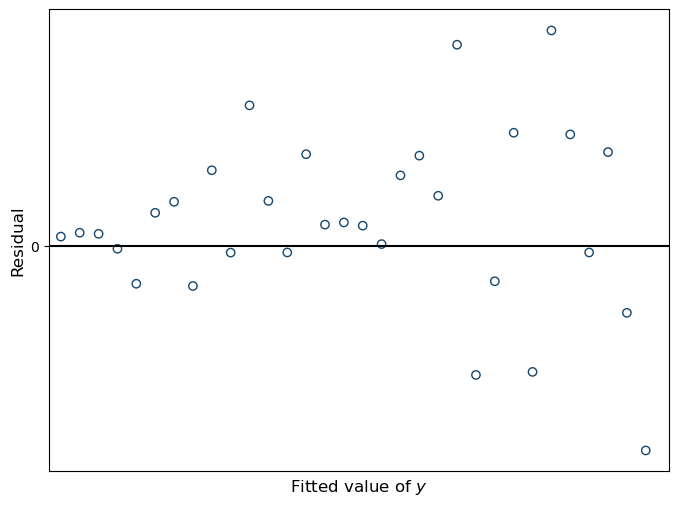

In [21]:
# Example 10: Plot of Heteroscedasticity

import numpy as np
import matplotlib.pyplot as plt


# Set seed for reproducibility
np.random.seed(6)  

# Generate x values
x = np.linspace(0, 5, 32)

# Generate y values with increasing values
y = 0.2 * x + 1 + np.random.normal(scale=3.1 * x, size=x.size)

# Create the plotting environment
fig, ax = plt.subplots(figsize=(8, 6))

# Assign color values
color_1 = '#15466d' # Dark blue

# Plot the data and the residuals
ax.scatter(x, y, edgecolor=color_1, facecolor='none')

# Plot the zero horizontal line 
plt.axhline(y=0, color='k', linestyle='-')

# Remove all x tick marks
ax.set_xticks([])

# Customize y-axis tick marks
ax.set_yticks([0])   # set 1 tick at 0
ax.set_yticklabels(['0'])  # label tick "0"

# Set x and y limits
ax.set(xlim=(-0.1,5.2))
#ax.set(ylim=(-8,8))

# Adding labels
ax.set_xlabel('Fitted value of $y$', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image29.png)

### **Exercise 10: Plot of _Homoscedasticity_**

In the cell below write the code for generating a plot showing Homooscedasticity using Python. 

_Code Hints:_

Since we are using a random number generator, we first set the random seed to a specific value so the result can be repeated

~~~text
# Set random seed
np.random.seed(2)
~~~

Use this code to generate the x values:

~~~text
# Generate x values
x = np.linspace(0, 10, 30)
~~~

Once the x-values have been generated, we can use the next code chunk to generate the y-values using the following code chunk:

~~~text
# Generate y values 
y = np.random.normal(0, 1, 30)
~~~

This code snippet is generating random $y$ values that simply follow a normal distribution, neither increasing nor decreasing as $x$ increases. 

Finally, comment out the line of code that sets the `y-limits`. Both the x-limits and the y-limits should be commented out.

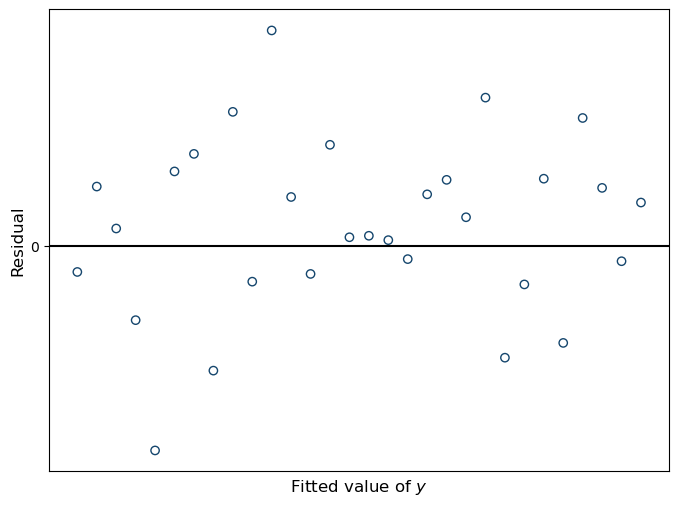

In [22]:
# Insert your code for Exercise 10 here

import numpy as np
import matplotlib.pyplot as plt


# Set seed for reproducibility
np.random.seed(6)  

# Generate x values
x = np.linspace(0, 10, 30)

# Generate y values 
y = np.random.normal(0, 1, 30)

# Create the plotting environment
fig, ax = plt.subplots(figsize=(8, 6))

# Assign color values
color_1 = '#15466d' # Dark blue

# Plot the data and the residuals
ax.scatter(x, y, edgecolor=color_1, facecolor='none')

# Plot the zero horizontal line 
plt.axhline(y=0, color='k', linestyle='-')

# Remove all x tick marks
ax.set_xticks([])

# Customize y-axis tick marks
ax.set_yticks([0])   # set 1 tick at 0
ax.set_yticklabels(['0'])  # label tick "0"

# Set x and y limits
#ax.set(xlim=(-0.1,5.2))
#ax.set(ylim=(-8,8))

# Adding labels
ax.set_xlabel('Fitted value of $y$', fontsize=12)
ax.set_ylabel('Residual', fontsize=12)

# Show plot
plt.show()

If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image45.png)

By visual inspection you should see that the distribution of `Residual` values doesn't show any obvious change as the value of $x$ increases. We wouldn't expect any systematic change since the "residuals" ($y$ values) were randomly generated to fall somewhere within a normal distribution. In other words, this plot illustrates what you should expect to see if your dataset exhibits **_homoscedasticity_**. Remember, your data needs to exhibit homoscedasticity for the results of the OLS analysis to be valid.

## **Transformations**  

Consider **Figure 17.12**. This graph is a two-way scatter plot of crude birth rate per 1000 population versus gross domestic product (GDP) per capita for 241 countries around the world. The GDP is  expressed in United States dollars. Note that birth rate decreases as GDP increases. The relationship,  however, is not a linear one. Instead, birth rate drops off rapidly at first; when the GDP per capita reaches approximately $15,000, and then begins to level off. Consequently, if we wish to describe the relationship between birth rate and GDP, we cannot use simple linear regression without applying  some type of transformation first. 

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 416). CRC Press. Kindle Edition. 



![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image18.png)

**FIGURE 17.12** Birth rate per 1000 population versus GDP per capita for 241 countries, 2015.

### Example 11A: Transformation - Step 1

The code in the cell below recreates **Figure 17.12**. The code is the same Python code that you would use to generate a two-scatter plot. The $x$ values are the values in the column `gdp` in the DataFrame `gdpDF` that was created at the beginning of this lesson. The $y$ values are the values in the column `birthrt`. 


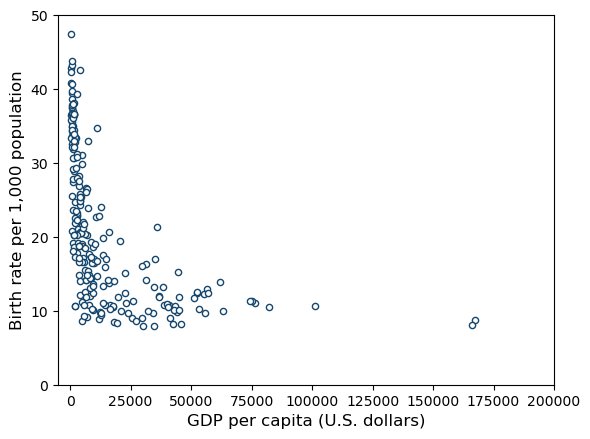

In [23]:
# Example 11A: Data Transformation - Step 1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Extract x- y-values
x = np.array(gdpDF['gdp'])
y = np.array(gdpDF['birthrt'])
             
# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Create a plotting environment
fig, ax = plt.subplots()

# Assign color values
color_1 = '#15466d' # Dark blue

# Create the scatter plot
scatter = ax.scatter(x,y, s=20, facecolor='white', edgecolor=color_1)

# Set x and y limits
ax.set(xlim=(-5000,200000))
ax.set(ylim=(0,50))

# Adding labels
# Set the x and y labels
ax.set_xlabel('GDP per capita (U.S. dollars)',fontsize=12)
ax.set_ylabel('Birth rate per 1,000 population',fontsize=12)

# Display the plot
plt.show()


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image31.png)

As you can see, the relationship is definitely not linear. In situations like this, you should try to find a **_transformation_** that can be applied to the data to make a the x/y relationship more linear. When selecting a suitable transformation, you should focus on _why_ the relationship looks non-linear. In this case, the effect of $x$ on $y$ diminishes as $x$ increases.

## **Data Transformations**

There are a wide variety of transformations that can be applied to data to make the relationship between x and y more linear. To create a linear relationship between $x$ and $y$, the following transformations are commonly used in statistics:

**_Logarithmic Transformation:_**

* **Log-Linear Model:** $y = \beta_0  + \beta_1 log(x) + ϵ$

* * Useful when the effect of $x$ on $y$ diminishes as $x$ increases.

**_Exponential Transformation:_**

* **Linear-Log Model:** $log(y) = \beta_0  + \beta_1 x + ϵ$

* * Suitable when $y$ grows exponentially with $x$

**_Power Transformation:_**

* **Log-Log Model:** $log(y) = \beta_0  + \beta_1 log(x) + ϵ$

* * Helps when both x and y exhibit exponential growth.

**_Square Root Transformation:_**

* **Square Root Model:** $y = \beta_0  + \beta_1 \sqrt{x} + ϵ$

* * Applied when the variance of $y$ increases with $x$

**_Reciprocal Transformation:_**

* **Reciprocal Model:**  $y = \beta_0 + \beta_1 \frac{1}{x} + \epsilon$

* * Effective for hyperbolic relationships.


### Example 11: Data Transformation - Step 2

By inspection of **Figure 17.12** you should note that the effect of $x$ on $y$ diminishes as $x$ increases. Looking at the list of possible transformations, it would appear the first one, the _logarithmic transformation:_ would appear to be the most appropiate. In this transformation we use the **_log-linear model:_** $y = \beta_0  + \beta_1 log(x) + ϵ$.

The code in the cell below transforms the GTP/birth weight data into a log-linear model by plotting the log of x as shown in this code chunk:

~~~text
# Log transform x
log_x = np.log(x)
~~~

This code recreates **Figure 17.14** on page 418 in your textbook.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image46.png)


**FIGURE 17.14** Birth rate per 1000 population versus the natural logarithm of GTP per capita

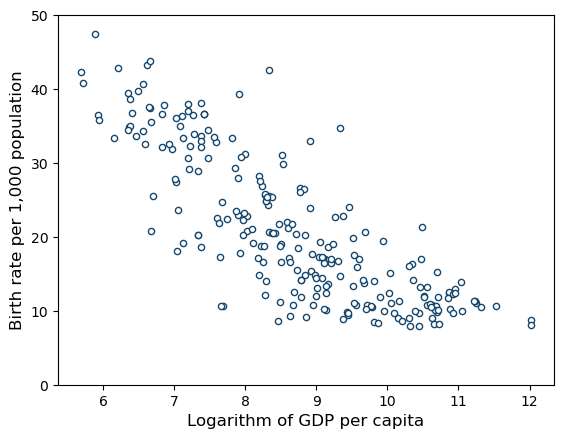

In [24]:
# Example 11B: Data Transformation - Step 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract x- y-values
x = np.array(gdpDF['gdp'])
y = np.array(gdpDF['birthrt'])

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Log transform x
log_x = np.log(x)
             
# Create plotting environment
fig, ax = plt.subplots()

# Assign color values
color_1 = '#15466d' # Dark blue

# Plot scatter plot
scatter = ax.scatter(log_x,y, s=20, facecolor='white', edgecolor=color_1)

# Set x and y limits
#ax.set(xlim=(-5000,200000))
ax.set(ylim=(0,50))

# Adding labels
ax.set_xlabel('Logarithm of GDP per capita',fontsize=12)
ax.set_ylabel('Birth rate per 1,000 population',fontsize=12)

# Display the plot
plt.show()


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_9_image32.png)

Note that the relationship between birth rate and the logarithm of GDP appears much more linear than the relationship between birth rate and GDP itself. Therefore, we could fit a simple linear regression model of the form:

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \ln(x). $$

## **Lesson Turn-in**

When you have completed and run all of the code cells, create a PDF of your notebook and upload the **_PDF_** to your Lesson_03_9 assignment in Canvas for grading.
